In [252]:
import numpy as np
import pandas as pd
import pickle
import plotly.graph_objects as go


In [218]:
# Reading defender wise passing attributes dataset
defender_attrs = pd.read_pickle('../data/defender_clustering_dataset.pkl')

In [219]:
# Filtering out left center backs from this dataset for both 4 at the back and non 4 at the back formations
defender_attrs_lcb = defender_attrs.loc[(defender_attrs['position']=='LCB') | (defender_attrs['position']=='L_CB')]

In [220]:
defender_attrs_lcb.head()

,player_name,team,position,footedness,passes,accpass,accpassloc,inaccpassloc,accpassvaep,inaccpassvaep,accpassoff,inaccpassoff,accpassdef,inaccpassdef,matches_played
1,AaronCresswell,West Ham,LCB,left,796,644,"[[[27.04, 51.68], [55.12, 64.6]], [[65.52, 61....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[-0.0012921183370053768, 0.003276045434176922,...","[-0.007468235678970814, -0.010166996158659458,...","[0.0015182411298155785, 0.003629088867455721, ...","[-0.005851619876921177, -0.008341009728610516,...","[-0.0028103594668209553, -0.000353043549694120...","[-0.001616615685634315, -0.001825986779294908,...",20.0
7,AdrianMariappa,Watford,L_CB,right,179,144,"[[[36.4, 45.56], [74.88, 48.28]], [[30.16, 46....","[[[43.68, 20.4], [42.64, 26.52]], [[27.04, 59....","[0.01236659474670887, 0.00999591127038002, -0....","[-0.018949441611766815, 0.00031638285145163536...","[0.007915441878139973, 0.009581996127963066, 0...","[0.0008363674860447645, -0.0007496089674532413...","[0.0044511533342301846, 0.0004139149095863104,...","[-0.01978580839931965, 0.0010659918189048767, ...",5.0
12,AhmedHegazi,West Brom,LCB,right,108,85,"[[[30.16, 59.84], [8.32, 52.36]], [[13.52, 45....","[[[38.48, 63.24], [67.6, 62.56]], [[32.24, 57....","[0.0013909346889704466, 0.0030438450630754232,...","[0.0012411349453032017, -0.004462606739252806,...","[-0.0003790883347392082, 0.001926282187923789,...","[0.0025845221243798733, -0.0030214847065508366...","[0.0017700230237096548, 0.0011175628751516342,...","[-0.0013433871790766716, -0.001441122032701969...",3.0
13,AhmedHegazi,West Brom,L_CB,right,438,347,"[[[31.2, 44.88], [41.6, 44.2]], [[46.8, 48.96]...","[[[41.6, 57.12], [70.72, 56.44]], [[27.04, 52....","[0.0022118184715509415, 0.004126500803977251, ...","[-0.000910191098228097, -0.008706741034984589,...","[0.0022044661454856396, 0.0031939628534018993,...","[0.0009662145748734474, -0.0024091354571282864...","[7.352326065301895e-06, 0.0009325379505753517,...","[-0.0018764056731015444, -0.006297605112195015...",16.0
21,AlfieMawson,Swansea,LCB,right,758,620,"[[[22.88, 47.6], [28.08, 57.12]], [[42.64, 63....","[[[6.24, 65.28], [3.12, 66.64]], [[28.08, 60.5...","[0.03826572746038437, 0.0004356576828286052, 0...","[-0.0026828828267753124, -0.002081183949485421...","[0.0028381505981087685, 0.0005238638259470463,...","[0.0008291075937449932, -0.0001498661004006862...","[0.035427577793598175, -8.82061431184411e-05, ...","[-0.0035119904205203056, -0.001931317849084735...",19.0


In [221]:
# Function to get start and end location points for every row in df
def getstartend(locs):
    end_points = list()
    start_points = list()
    for point in locs:
            if point != []:
                end_points.append(point[1])
                start_points.append(point[0])
    return start_points,end_points

In [222]:
# Function to segregate progressive passes for every row of pass location column
def distfilter(locs,vaeps):
    loc_start, loc_end = getstartend(locs)
    progaccpass = 0
    prog_accpasslocs = list()
    prog_accpassvaeps = list()
    for p1,p2,vaep in zip(loc_start,loc_end,vaeps):
        dist = np.round(np.linalg.norm(np.array(p1) - np.array(p2)),2)
        if p1[0] < 52 and dist >= 30 and p1[0] < p2[0]:
            prog_accpasslocs.append([np.round(p1,2),np.round(p2,2)])
            prog_accpassvaeps.append(vaep)
        elif p1[0] > 52 and dist >= 10 and p1[0] < p2[0]:
            prog_accpasslocs.append([np.round(p1,2),np.round(p2,2)])
            prog_accpassvaeps.append(vaep)
    progaccpass = len(prog_accpasslocs)
    return pd.Series([prog_accpasslocs,prog_accpassvaeps,progaccpass])
            

In [223]:
defender_attrs_lcb[['progaccpassloc','progaccpassvaep','progaccpass']] = defender_attrs_lcb.apply(lambda x: distfilter(x['accpassloc'],x['accpassvaep']), axis = 1)

/Users/shreygrover/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [224]:
defender_attrs_lcb.reset_index(inplace = True)

In [225]:
defender_attrs_lcb.head()

,index,player_name,team,position,footedness,passes,accpass,accpassloc,inaccpassloc,accpassvaep,inaccpassvaep,accpassoff,inaccpassoff,accpassdef,inaccpassdef,matches_played,progaccpassloc,progaccpassvaep,progaccpass
0,1,AaronCresswell,West Ham,LCB,left,796,644,"[[[27.04, 51.68], [55.12, 64.6]], [[65.52, 61....","[[[62.4, 51.0], [78.0, 49.64]], [[79.04, 61.2]...","[-0.0012921183370053768, 0.003276045434176922,...","[-0.007468235678970814, -0.010166996158659458,...","[0.0015182411298155785, 0.003629088867455721, ...","[-0.005851619876921177, -0.008341009728610516,...","[-0.0028103594668209553, -0.000353043549694120...","[-0.001616615685634315, -0.001825986779294908,...",20.0,"[[[27.04, 51.68], [55.12, 64.6]], [[61.36, 59....","[-0.0012921183370053768, 0.0036208073142915964...",184
1,7,AdrianMariappa,Watford,L_CB,right,179,144,"[[[36.4, 45.56], [74.88, 48.28]], [[30.16, 46....","[[[43.68, 20.4], [42.64, 26.52]], [[27.04, 59....","[0.01236659474670887, 0.00999591127038002, -0....","[-0.018949441611766815, 0.00031638285145163536...","[0.007915441878139973, 0.009581996127963066, 0...","[0.0008363674860447645, -0.0007496089674532413...","[0.0044511533342301846, 0.0004139149095863104,...","[-0.01978580839931965, 0.0010659918189048767, ...",5.0,"[[[36.4, 45.56], [74.88, 48.28]], [[30.16, 46....","[0.01236659474670887, 0.00999591127038002, 0.0...",29
2,12,AhmedHegazi,West Brom,LCB,right,108,85,"[[[30.16, 59.84], [8.32, 52.36]], [[13.52, 45....","[[[38.48, 63.24], [67.6, 62.56]], [[32.24, 57....","[0.0013909346889704466, 0.0030438450630754232,...","[0.0012411349453032017, -0.004462606739252806,...","[-0.0003790883347392082, 0.001926282187923789,...","[0.0025845221243798733, -0.0030214847065508366...","[0.0017700230237096548, 0.0011175628751516342,...","[-0.0013433871790766716, -0.001441122032701969...",3.0,"[[[9.36, 49.64], [46.8, 35.36]], [[59.28, 60.5...","[0.002894850680604577, 0.018502848222851753, 0...",25
3,13,AhmedHegazi,West Brom,L_CB,right,438,347,"[[[31.2, 44.88], [41.6, 44.2]], [[46.8, 48.96]...","[[[41.6, 57.12], [70.72, 56.44]], [[27.04, 52....","[0.0022118184715509415, 0.004126500803977251, ...","[-0.000910191098228097, -0.008706741034984589,...","[0.0022044661454856396, 0.0031939628534018993,...","[0.0009662145748734474, -0.0024091354571282864...","[7.352326065301895e-06, 0.0009325379505753517,...","[-0.0018764056731015444, -0.006297605112195015...",16.0,"[[[35.36, 38.08], [43.68, 5.44]], [[33.28, 38....","[-0.0015584089560434222, 0.006373148411512375,...",72
4,21,AlfieMawson,Swansea,LCB,right,758,620,"[[[22.88, 47.6], [28.08, 57.12]], [[42.64, 63....","[[[6.24, 65.28], [3.12, 66.64]], [[28.08, 60.5...","[0.03826572746038437, 0.0004356576828286052, 0...","[-0.0026828828267753124, -0.002081183949485421...","[0.0028381505981087685, 0.0005238638259470463,...","[0.0008291075937449932, -0.0001498661004006862...","[0.035427577793598175, -8.82061431184411e-05, ...","[-0.0035119904205203056, -0.001931317849084735...",19.0,"[[[35.36, 51.68], [74.88, 15.64]], [[64.48, 52...","[0.008424276486039162, 0.007532407529652119, 0...",150


In [226]:
# Dropping defenders who have zero progressive passes
defender_attrs_lcb = defender_attrs_lcb.loc[defender_attrs_lcb['progaccpass']!=0]

In [227]:
# Counting the total number of progressive passes and progressive vaep values for left center backs
counter_prog = 0
counter_prog_vaep = 0
for index, row in defender_attrs_lcb.iterrows():
    counter_prog = counter_prog + len(row['progaccpassloc'])
    counter_prog_vaep = counter_vaep + len(row['progaccpassvaep'])

In [228]:
counter_prog, counter_prog_vaep

(6864, 30232)

In [229]:
np.sum(defender_attrs_lcb['progaccpass'].tolist())

6864

In [230]:
def_cols = defender_attrs_lcb.columns
len(def_cols)

19

In [231]:
new_def_cols = ['index','player_name','team','position','footedness','matches_played','passes','accpass','progaccpass','accpassloc',
                'inaccpassloc','progaccpassloc','accpassvaep','inaccpassvaep','progaccpassvaep','accpassoff','inaccpassoff',
                'accpassdef','inaccpassdef']
print(len(new_def_cols))
defender_attrs_lcb = defender_attrs_lcb[new_def_cols]

19


In [232]:
# Saving dataframe in data folder
defender_attrs_lcb.to_pickle('../data/defender_clusters/defender_attrs_lcb_prog.pkl')

In [233]:
# Function to get x and y coordinates of pass locations
def getxy(locs):
    x = list()
    y = list()
    for p in locs:
        x.append(p[0])
        y.append(p[1])
    return x,y

In [234]:
# Function to calcuate total value added by passes in each of the following regions:
#  ( x - length of the pitch) (y - width of the pitch)
# Right Flank Attack - x >= 52 and y <= 17
# Right Flank Defence - x < 52 and y <= 17
# Right Central Attack - x >= 52 and y > 17 and y <= 34
# Right Central Defence - x < 52 and y > 17 and y <= 34
# Left Central Attack - x >= 52 and y > 34 and y <= 51
# Left Central Defence - x < 52 and y > 34 and y <= 51
# Left Flank Attack - x >= 52 and y > 51 and y <= 68
# Left Flank Defence - x < 52 and y > 51 and y <= 68
def get_vaep_region(x,y,vaep):
    if vaep!= []:
        vaep_rightflank_attack = np.sum([vaep[i] for i in range(len(x)) if (x[i]>=52) and (y[i]<=17)])
        vaep_rightflank_defence = np.sum([vaep[i] for i in range(len(x)) if (x[i]<52) and (y[i]<=17)])
        vaep_rightcentral_attack = np.sum([vaep[i] for i in range(len(x)) if (x[i]>=52) and (y[i]>17) and (y[i]<=34)])
        vaep_rightcentral_defence = np.sum([vaep[i] for i in range(len(x)) if (x[i]<52) and (y[i]>17) and (y[i]<=34)])
        vaep_leftcentral_attack = np.sum([vaep[i] for i in range(len(x)) if (x[i]>=52) and (y[i]>34) and (y[i]<=51)])
        vaep_leftcentral_defence = np.sum([vaep[i] for i in range(len(x)) if (x[i]<52) and (y[i]>34) and (y[i]<=51)])
        vaep_leftflank_attack = np.sum([vaep[i] for i in range(len(x)) if (x[i]>=52) and (y[i]>51) and (y[i]<=68)])
        vaep_leftflank_defence = np.sum([vaep[i] for i in range(len(x)) if (x[i]<52) and (y[i]>51) and (y[i]<=68)])
    
    return [vaep_leftflank_defence,vaep_leftcentral_defence,vaep_rightcentral_defence,vaep_rightflank_defence,vaep_leftflank_attack,vaep_leftcentral_attack,vaep_rightcentral_attack,vaep_rightflank_attack]

In [235]:
# Function to get total number of progressive pass made in each of the following regions:
#  ( x - length of the pitch) (y - width of the pitch)
# Right Flank Attack - x >= 52 and y <= 17
# Right Flank Defence - x < 52 and y <= 17
# Right Central Attack - x >= 52 and y > 17 and y <= 34
# Right Central Defence - x < 52 and y > 17 and y <= 34
# Left Central Attack - x >= 52 and y > 34 and y <= 51
# Left Central Defence - x < 52 and y > 34 and y <= 51
# Left Flank Attack - x >= 52 and y > 51 and y <= 68
# Left Flank Defence - x < 52 and y > 51 and y <= 68
def get_prog_pass_region(x,y):
    if x!=[]:
        x_rightflank_attack = [
            x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)]
        y_rightflank_attack = [
            y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)]
        x_rightflank_def = [
            x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)]
        y_rightflank_def = [
            y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)]
        x_leftflank_attack = [
            x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)]
        y_leftflank_attack = [
            y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)]
        x_leftflank_def = [
            x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)]
        y_leftflank_def = [
            y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)]
        x_rightcentral_attack = [
            x[i] for i in range(len(x))
            if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)]
        y_rightcentral_attack = [
            y[i] for i in range(len(x))
            if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)]
        x_rightcentral_def = [
            x[i] for i in range(len(x))
            if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)]
        y_rightcentral_def = [
            y[i] for i in range(len(x))
            if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)]
        x_leftcentral_attack = [
            x[i] for i in range(len(x))
            if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)]
        y_leftcentral_attack = [
            y[i] for i in range(len(x))
            if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)]
        x_leftcentral_def = [
            x[i] for i in range(len(x))
            if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)]
        y_leftcentral_def = [
            y[i] for i in range(len(x))
            if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)]
    return [len(x_leftflank_def), len(x_leftcentral_def),
        len(x_rightcentral_def), len(x_rightflank_def), 
        len(x_leftflank_attack), len(x_leftcentral_attack), 
        len(x_rightcentral_attack), len(x_rightflank_attack)]

In [263]:
# Function to calculate progressive passes per region and vaep value per region
# Note: vaep value is divided by the number of progresssive passes and scaled to 10000 to make the value significant
def get_region_wise(locs,vaep):
    locs_start, locs_end = getstartend(locs)
    locs_x, locs_y = getxy(locs_end)
    vaep_region = get_vaep_region(locs_x,locs_y,vaep)
    vaep_region_per_pass = [(i/len(locs_x))*10000 for i in vaep_region]  
    prog_region = get_prog_pass_region(locs_x,locs_y)
    prog_region_per_pass = [np.round(i/len(locs_x)*100,2) for i in prog_region]
    return pd.Series([prog_region_per_pass,vaep_region_per_pass])

In [264]:
defender_attrs_lcb[['prog_region_per_pass','vaep_region_per_pass']] = defender_attrs_lcb.apply(lambda x: get_region_wise(x['progaccpassloc'],x['progaccpassvaep']), axis = 1)

In [292]:
defender_attrs_lcb.loc[defender_attrs_lcb['player_name']=='BrunoMartinsIndi']

,index,player_name,team,position,footedness,matches_played,passes,accpass,progaccpass,accpassloc,...,progaccpassloc,accpassvaep,inaccpassvaep,progaccpassvaep,accpassoff,inaccpassoff,accpassdef,inaccpassdef,prog_region_per_pass,vaep_region_per_pass
14,55,BrunoMartinsIndi,Stoke,LCB,left,2.0,91,83,26,"[[[47.84, 32.64], [65.52, 64.6]], [[37.44, 51....",...,"[[[47.84, 32.64], [65.52, 64.6]], [[59.28, 41....","[0.0011243479093536735, -0.003485072636976838,...","[-0.0018702158704400063, -0.0100428881123662, ...","[0.0011243479093536735, 0.008066927082836628, ...","[-0.00011550076305866241, -0.00240093749016523...","[-0.000661713071167469, -0.009857052005827427,...","[0.0012398486724123359, -0.0010841351468116045...","[-0.0012085027992725372, -0.000185836106538772...","[0.0, 0.0, 0.0, 7.69, 50.0, 15.38, 11.54, 15.38]","[0.0, 0.0, 0.0, -0.9136276247982795, 14.181490..."
15,56,BrunoMartinsIndi,Stoke,L_CB,left,10.0,186,142,17,"[[[31.2, 31.96], [70.72, 9.52]], [[22.88, 39.4...",...,"[[[31.2, 31.96], [70.72, 9.52]], [[54.08, 59.1...","[0.007600221782922745, 0.005220275372266769, -...","[-0.0032848939299583435, -0.002151201013475656...","[0.007600221782922745, 0.0026042244862765074, ...","[0.008977348916232586, -0.000903882784768939, ...","[0.003325612749904394, -0.0036109769716858864,...","[-0.0013771271333098412, 0.006124157924205065,...","[-0.006610506679862738, 0.0014597759582102299,...","[5.88, 0.0, 0.0, 11.76, 35.29, 17.65, 11.76, 1...","[12.931188239770778, 0.0, 0.0, 4.6705073841354..."


In [266]:
# Saving the region wise pass and vaep dataframe
defender_attrs_lcb.to_pickle('../data/defender_clusters/defender_attrs_lcb_region_wise.pkl')

In [267]:
len(defender_attrs_lcb)

102

In [268]:
len(defender_attrs_lcb.loc[defender_attrs_lcb['matches_played']>=10])

32

In [269]:
len(defender_attrs_lcb.loc[defender_attrs_lcb['progaccpass']>=10])

85

In [270]:
defender_attrs_lcb_plot = defender_attrs_lcb[['player_name','team','position','footedness','matches_played',
                                                 'progaccpass','prog_region_per_pass','vaep_region_per_pass']]

In [276]:
defender_attrs_lcb_plot = defender_attrs_lcb_plot.loc[defender_attrs_lcb_plot['progaccpass']>=10]

In [290]:
# Function to plot scatter plots for preference over value addition across regions
# Arguments : 
# prog_region -  A list of proggressive pasess per region (in percentage)
# veap_region - A list of vaep values per region (scaled by 10000)
# att_def - 'Attack' for attacking region and 'Defence' for defensive region
def plot_preference_value_region(df):
    regions = ['leftflank_def','leftcentral_def',
           'rightcentral_def','rightflank_def',
           'leftflank_attack','leftcentral_attack',
           'rightcentral_attack','rightflank_attack']
    for i in range(8):
        prog_region = list()
        vaep_region =list()
        player_name_position = list()
        for idx, row in df.iterrows():
            prog_region.append(row['prog_region_per_pass'][i])
            vaep_region.append(row['vaep_region_per_pass'][i])
            player_name_position.append(row['player_name'] + " " + row['position'] + " " + row['footedness'])
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = prog_region, y = vaep_region, text = player_name_position, name = 'Plot' + str(i), mode = 'markers'))
        fig.update_layout(
            annotations=[
                dict(
                x=0.5,
                y=-0.15,
                showarrow=False,
                text = '% Progressive passes',
                xref="paper",
                yref="paper"),
                dict(
                x=-0.07,
                y=0.5,
                showarrow = False,
                text = 'VAEP per progressive pass (scaled to 10000)',
                textangle = -90,
                xref="paper",
                yref="paper")
            ],
            autosize=True,
            margin=dict(
            b=100
            ),
            title_text = str(regions[i]))
        fig.show()

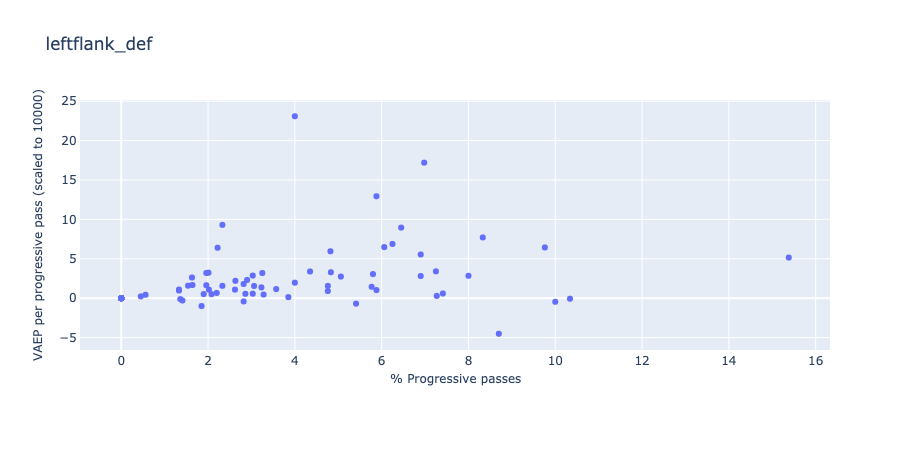

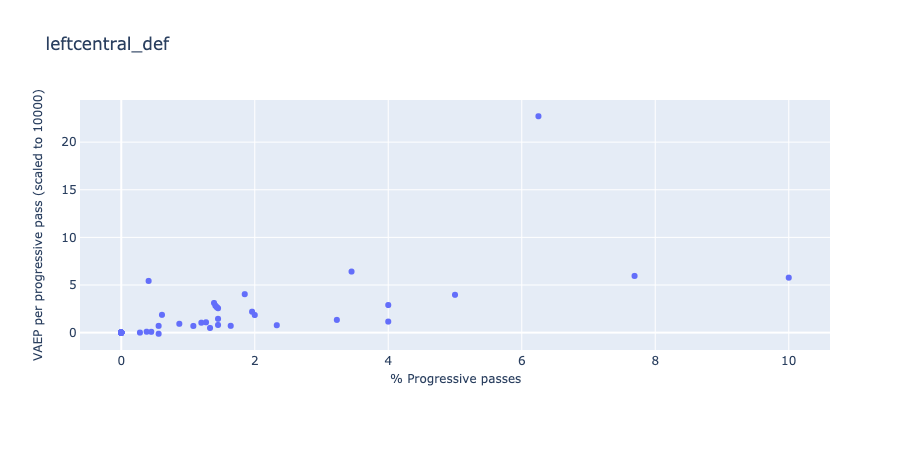

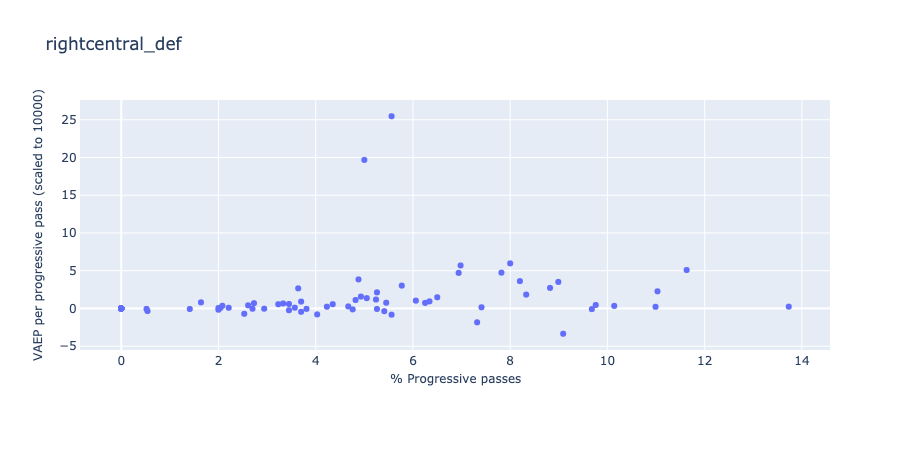

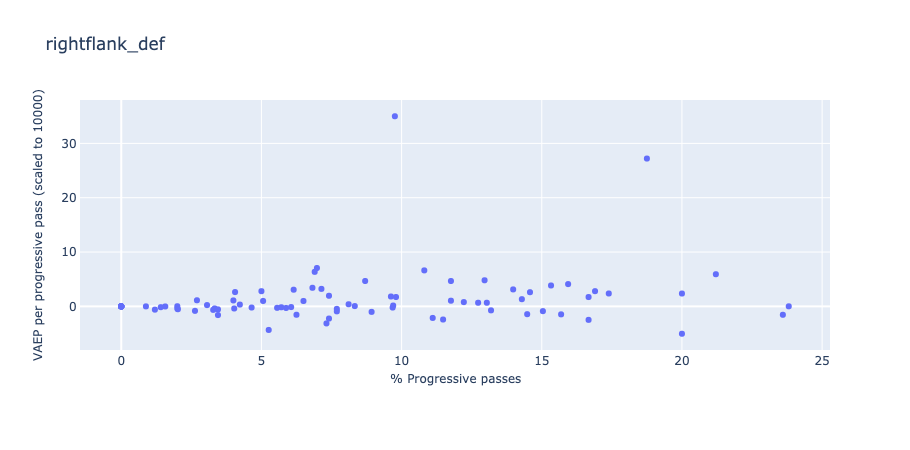

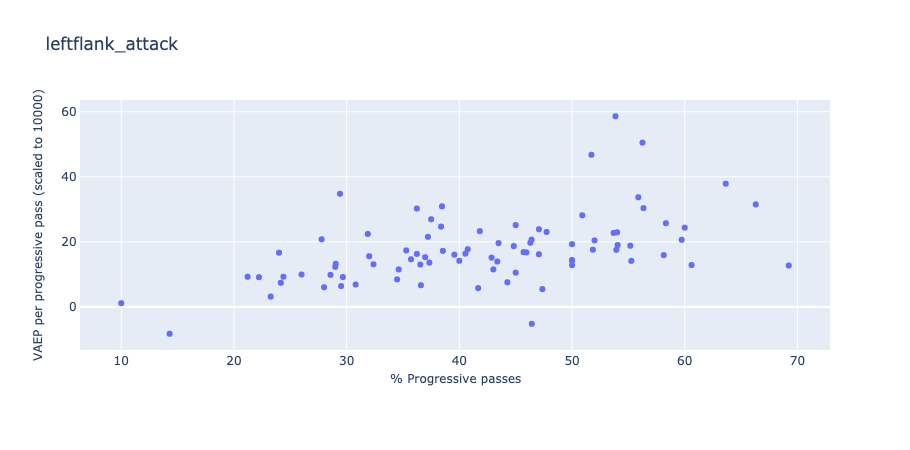

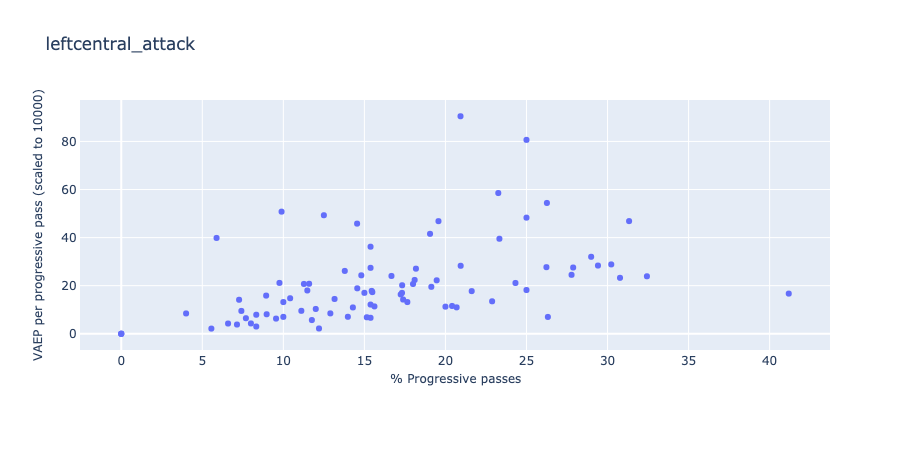

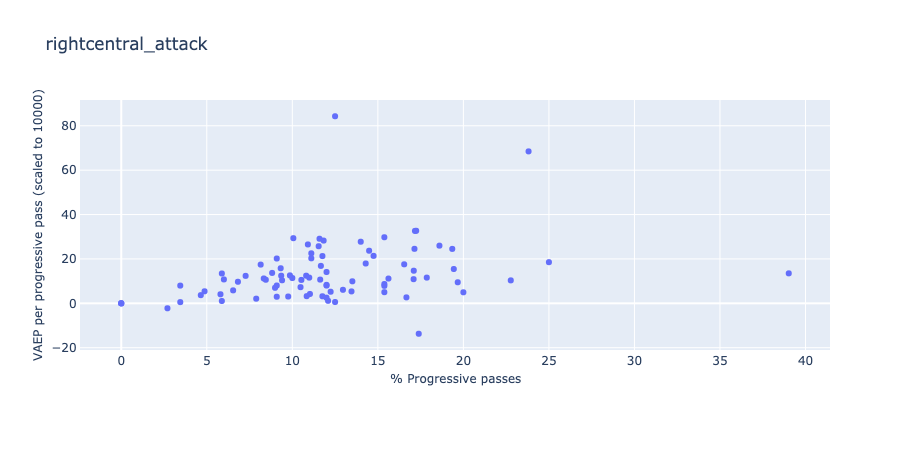

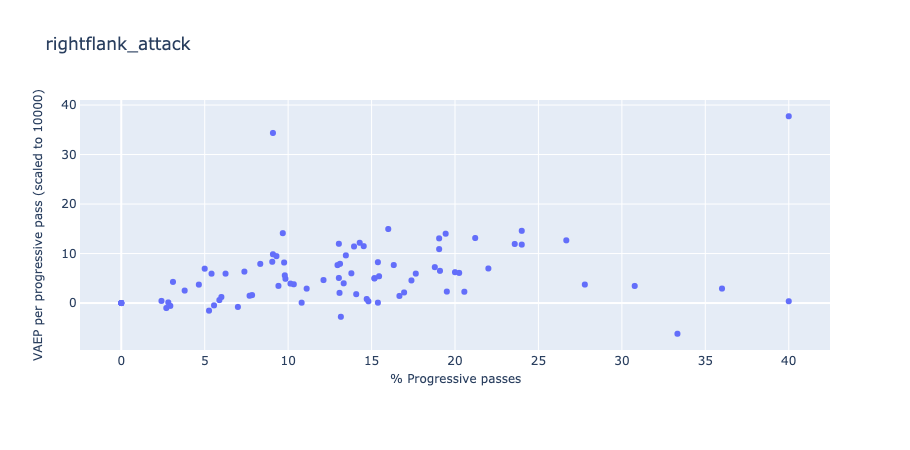

In [291]:
plot_preference_value_region(defender_attrs_lcb_plot)